In [3]:
import pandas as pd
import numpy as np
import folium
from matplotlib import pyplot as plt
from numpy import mean
from numpy import std

In [4]:
#loading the owner info
df_owner_info = pd.read_csv("df_owner_info.csv")

df_owner_info

,Unnamed: 0,owner,num_low_violations,num_medium_violations,num_high_violations,num_units_owned
0,0,36-38 CUNARD STREET LLC,28.0,1.0,0.0,1.0
1,1,CEVN LLC,1.0,4.0,1.0,1.0
2,2,CRISTALLO GINA TS,2.0,3.0,0.0,1.0
3,3,GPD BRIMMER 4 LLC,12.0,0.0,0.0,1.0
4,4,GUIDO DOMINGOS DOS SANTOS,3.0,4.0,2.0,1.0
...,...,...,...,...,...,...
107005,107005,ZIPP ALICIA M,0.0,0.0,2.0,1.0
107006,107006,ZIRPOLO JOHN V TS,0.0,0.0,1.0,1.0
107007,107007,ZITANO CAROLYN,0.0,0.0,3.0,1.0
107008,107008,ZOLLA MARIA T ETAL,0.0,0.0,1.0,1.0


In [5]:
#adding the sum violation column which adds up the number of violations by an owner
df_owner_info["sum_violations"] = df_owner_info['num_low_violations'] + df_owner_info['num_medium_violations']



In [6]:
#owner sum is a bit different  than the rent smart violation table
df_owner_info['owner'].value_counts().head(5)

 36-38  CUNARD  STREET  LLC    1
SMITH VINCENT J                1
SMITH SHAUN                    1
SMITH SHARRON                  1
SMITH SHARON ANGELLA           1
Name: owner, dtype: int64

In [7]:
#sorting by number of units owned
df_owner_info.sort_values(by=['num_units_owned'], ascending=False)

,Unnamed: 0,owner,num_low_violations,num_medium_violations,num_high_violations,num_units_owned,sum_violations
15427,15427,CITY OF BOSTON,896.0,371.0,735.0,1985.0,1267.0
16552,16552,COMMONWEALTH OF MASSACHUSETTS,55.0,45.0,36.0,1410.0,100.0
16548,16548,COMMONWEALTH OF MASS,84.0,38.0,29.0,1237.0,122.0
76717,76717,TOWN OF WILMINGTON,6.0,1.0,0.0,805.0,7.0
31249,31249,GLOUCESTER CITY OF,139.0,72.0,26.0,652.0,211.0
...,...,...,...,...,...,...,...
38309,38309,JEAN-BAPTISTE LUCIA,1.0,0.0,0.0,1.0,1.0
38308,38308,JEAN-BAPTISTE JAKES,1.0,2.0,0.0,1.0,3.0
38307,38307,JEAN-BAPTISTE FABIENNE,3.0,1.0,0.0,1.0,4.0
38306,38306,JEAN-BAPTISTE ALTAGRACE,5.0,1.0,0.0,1.0,6.0


In [8]:
#correlation table/ matrix

df_owner_info.corr()

,Unnamed: 0,num_low_violations,num_medium_violations,num_high_violations,num_units_owned,sum_violations
Unnamed: 0,1.000000,-0.130392,-0.070653,-0.055077,-0.007437,-0.129773
num_low_violations,-0.130392,1.000000,0.490857,0.466747,0.131139,0.985226
num_medium_violations,-0.070653,0.490857,1.000000,0.506871,0.233155,0.632813
num_high_violations,-0.055077,0.466747,0.506871,1.000000,0.236269,0.514452
num_units_owned,-0.007437,0.131139,0.233155,0.236269,1.000000,0.162380
sum_violations,-0.129773,0.985226,0.632813,0.514452,0.162380,1.000000


/var/folders/sv/v002sx6n7r57yl0d615d6b6c0000gn/T/ipykernel_18727/3107136875.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, annot = True, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

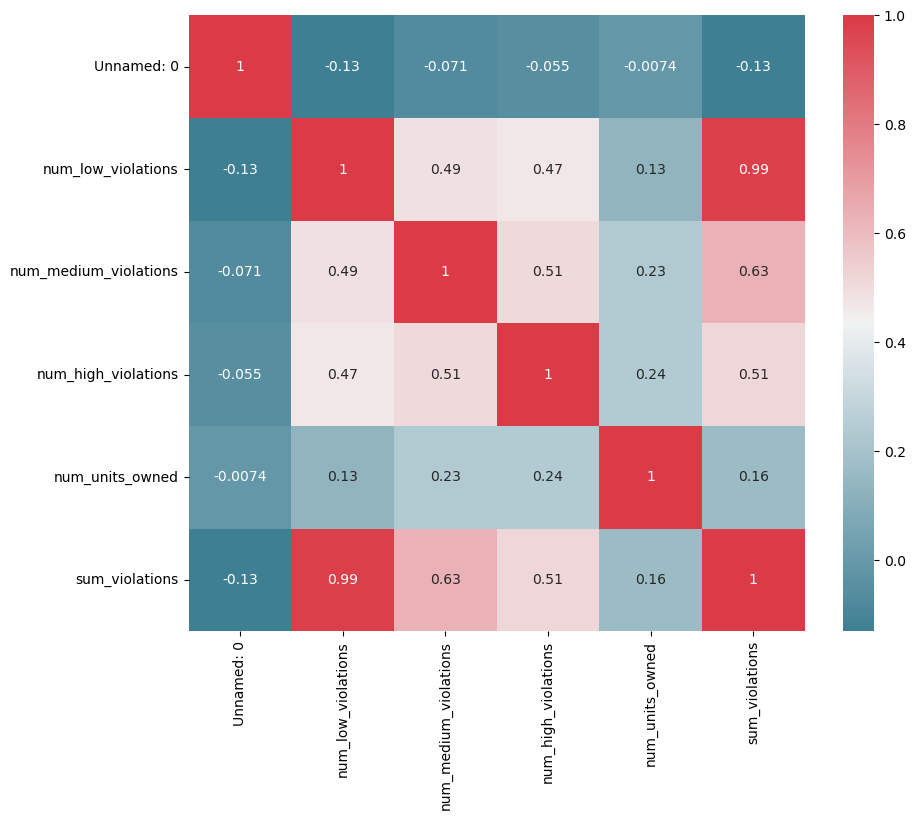

In [9]:
#correlation heatmap

import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = df_owner_info.corr()
sns.heatmap(corr, annot = True, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [10]:
#correlation value betwwen the number of properties owned and the number of violation that owner has
correlation_sv = df_owner_info["sum_violations"].corr(df_owner_info["num_units_owned"])

correlation_sv

0.16237954603533222

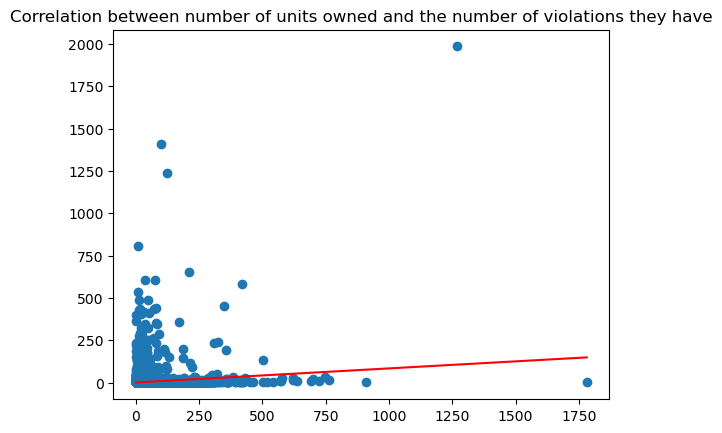

In [11]:
plt.scatter(df_owner_info["sum_violations"], df_owner_info["num_units_owned"])

plt.title("Correlation between number of units owned and the number of violations they have")

plt.plot(np.unique(df_owner_info["sum_violations"]), np.poly1d(np.polyfit(df_owner_info["sum_violations"], df_owner_info["num_units_owned"], 1))
         (np.unique(df_owner_info["sum_violations"])), color='red')